In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split


In [ ]:
#reading the data from the csv file
df = pd.read_csv('10YearPeriodHIV-describe.csv')
df.info()
def estimate_coef(x, y):
	# number of observations/points
	n = np.size(x)

	# mean of x and y vector
	m_x = np.mean(x)
	m_y = np.mean(y)

	# calculating cross-deviation and deviation about x
	SS_xy = np.sum(y*x) - n*m_y*m_x
	SS_xx = np.sum(x*x) - n*m_x*m_x

	# calculating regression coefficients
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Period              11 non-null     int64  
 1   ART_mean            11 non-null     float64
 2   Death_mean          11 non-null     float64
 3   HIVpopulation_mean  11 non-null     float64
 4   Population_mean     11 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 568.0 bytes


In [ ]:
df.head()


,Period,ART_mean,Death_mean,HIVpopulation_mean,Population_mean
0,2011,30.573,5313.600,144875.200,15454060.0
1,2012,33.760,4877.866,146104.266,15714790.0
2,2013,37.080,4498.600,149145.466,15980280.0
3,2014,40.480,4259.600,152060.667,16251110.0
4,2015,44.253,4071.600,152944.667,16526480.0


In [ ]:
X = df['Period']
y = df['ART_mean']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42) # Split data into training and testing sets.

#Linear
n = X_train.shape[0]
A = np.ones((n,2))
A[:,1] = X_train
c = np.linalg.lstsq(A,y_train,rcond=-1)[0]
print(f"Gradient: {c[1]}, y-intercept: {c[0]}")
y_linear = c[1] * X + c[0]

Gradient: 54.29620205479496, y-intercept: -109266.63136986391


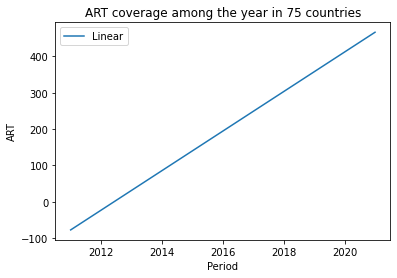

In [ ]:
#Plotting Fits
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(X,y_linear,'-',label="Linear")
plt.xlabel("Period")
plt.ylabel("ART")
plt.title("ART coverage among the year in 75 countries")
ax.legend()

In [ ]:
# Testing

y_linear = c[1] * X_test + c[0]
print(r2_score(y_test,y_linear)) # model has a negativ r2 score. The model has failed.

-470.23625631017643


   Period  ART coverage
0    2021    465.992983
1    2022    520.289185
2    2023    574.585387
3    2024    628.881589
4    2025    683.177791


Text(0.5, 1.0, 'ART coverage in 5 years among 75 countries ')

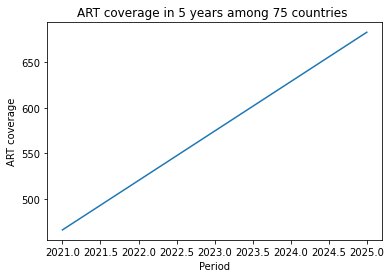

In [ ]:
# Predictions
X_max = 2021

X_predict = np.arange(X_max, X_max+5,1) 
# Predicting HIV increase in the next 5 years

y_predict = c[1] * X_predict + c[0]
df_predict = pd.DataFrame(data={'Period': X_predict, 'ART coverage':y_predict})



print(df_predict)

# Plotting results of regression
plt.plot(X_predict,y_predict,'-')
plt.xlabel("Period")
plt.ylabel("ART coverage")
plt.title("ART coverage in 5 years among 75 countries ")